# The Challenge

##### The sinking of the Titanic is one of the most infamous shipwrecks in history.

##### On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

##### While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

##### In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

In [244]:
# Import the important library 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [245]:
df_train = pd.read_csv('/Users/DELL/Desktop/Data Science Project/Titanic/train.csv')
df_test = pd.read_csv('/Users/DELL/Desktop/Data Science Project/Titanic/test.csv')

In [246]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [247]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Data Dictionary

- Survived: 0 = No, 1 = Yes
- pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
- sibsp: # of siblings / spouses aboard the Titanic
- parch: # of parents / children aboard the Titanic
- ticket: Ticket number
- cabin: Cabin number
- embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

In [248]:
# combining train and test dataset 
# Data cleaning done on combined data set

df_final = pd.concat([df_train, df_test], axis = 0)
df_final.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [249]:
df_final.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

# Feature engineering

- Perform feature engineering on features like Name, Sex, Age, Ticket etc

# 1. Name (Title)


In [250]:
df_final['Title'] = df_final['Name'].str.extract('([A-Za-z]+)\.', expand=False)
df_final

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Dona
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Mr


In [251]:
df_final['Title'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: Title, dtype: int64

In [252]:
df_final["Title"] = df_final["Title"].map(lambda x: 0 if x == "Mr" else 1 if x == 'Miss' else 
                                           2 if x == 'Mrs' else 3 if x == 'Master' else 4)
df_final

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,4
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


# 2. Sex

In [253]:
df_final["Sex"] = df_final["Sex"].apply(lambda x:0 if x == 'male' else 1)
df_final

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",0,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,C,4
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,NaN,3,"Ware, Mr. Frederick",0,NaN,0,0,359309,8.0500,NaN,S,0


# 3. Age

In [254]:
# There are some Nan values in age, let's impute them with median if Title
df_final["Age"].fillna(df_final.groupby("Title")["Age"].transform("median"), inplace=True)


In [255]:
df_final['Age'] = df_final['Age'].map(lambda x : 0 if x < 16 else 1 if x < 26 else 2 if x <36 else 3 if x <62 else 4)
df_final

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3,1,0,PC 17599,71.2833,C85,C,2
2,3,1.0,3,"Heikkinen, Miss. Laina",1,2,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,C123,S,2
4,5,0.0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",0,2,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",1,3,0,0,PC 17758,108.9000,C105,C,4
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",0,3,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,NaN,3,"Ware, Mr. Frederick",0,2,0,0,359309,8.0500,NaN,S,0


# 4. Fare 

In [256]:
df_final["Fare"].isnull().sum()

1

In [257]:
df_final["Fare"].fillna(df_final.groupby("Pclass")["Fare"].transform("median"), inplace=True)

In [258]:
df_final.groupby('Pclass')["Fare"].mean()

Pclass
1    87.508992
2    21.179196
3    13.295480
Name: Fare, dtype: float64

In [259]:
df_final['Fare'] = df_final['Fare'].map(lambda x : 0 if x < 20 else 1 if x < 30 else 2 if x <60 else 3 if x <100 else 4)

# 5. Embarked

In [260]:
df_final['Embarked'].isnull().sum()

2

In [261]:
df_final["Embarked"].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [262]:
df_final['Embarked'] = df_final['Embarked'].fillna('S')
df_final['Embarked'] = df_final['Embarked'].map(lambda x : 0 if x == 'S' else 1 if x == 'C' else 2)
df_final

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,0,NaN,0,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3,1,0,PC 17599,3,C85,1,2
2,3,1.0,3,"Heikkinen, Miss. Laina",1,2,0,0,STON/O2. 3101282,0,NaN,0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,2,C123,0,2
4,5,0.0,3,"Allen, Mr. William Henry",0,2,0,0,373450,0,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",0,2,0,0,A.5. 3236,0,NaN,0,0
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",1,3,0,0,PC 17758,4,C105,1,4
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",0,3,0,0,SOTON/O.Q. 3101262,0,NaN,0,0
416,1308,NaN,3,"Ware, Mr. Frederick",0,2,0,0,359309,0,NaN,0,0


# 6. Cabin

In [263]:
df_final['Cabin'] =  df_final['Cabin'].str[:1]
df_final['Cabin'].value_counts()

C    94
B    65
D    46
E    41
A    22
F    21
G     5
T     1
Name: Cabin, dtype: int64

In [264]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
df_final['Cabin'] = df_final['Cabin'].map(cabin_mapping)
df_final

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,0,NaN,0,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3,1,0,PC 17599,3,0.8,1,2
2,3,1.0,3,"Heikkinen, Miss. Laina",1,2,0,0,STON/O2. 3101282,0,NaN,0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,2,0.8,0,2
4,5,0.0,3,"Allen, Mr. William Henry",0,2,0,0,373450,0,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",0,2,0,0,A.5. 3236,0,NaN,0,0
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",1,3,0,0,PC 17758,4,0.8,1,4
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",0,3,0,0,SOTON/O.Q. 3101262,0,NaN,0,0
416,1308,NaN,3,"Ware, Mr. Frederick",0,2,0,0,359309,0,NaN,0,0


In [265]:
df_final["Cabin"] = df_final["Cabin"].fillna(df_final.groupby('Pclass')['Cabin'].transform('mean'))

In [266]:
df_final

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,0,2.05,0,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3,1,0,PC 17599,3,0.80,1,2
2,3,1.0,3,"Heikkinen, Miss. Laina",1,2,0,0,STON/O2. 3101282,0,2.05,0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,2,0.80,0,2
4,5,0.0,3,"Allen, Mr. William Henry",0,2,0,0,373450,0,2.05,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",0,2,0,0,A.5. 3236,0,2.05,0,0
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",1,3,0,0,PC 17758,4,0.80,1,4
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",0,3,0,0,SOTON/O.Q. 3101262,0,2.05,0,0
416,1308,NaN,3,"Ware, Mr. Frederick",0,2,0,0,359309,0,2.05,0,0


# 7. FamilySize

In [267]:
df_final["FamilySize"] = df_final["SibSp"] + df_final["Parch"] + 1

In [268]:
df_final["FamilySize"].isnull().sum()

0

In [269]:
df_final["FamilySize"].unique()

array([ 2,  1,  5,  3,  7,  6,  4,  8, 11], dtype=int64)

In [270]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
df_final['FamilySize'] = df_final['FamilySize'].map(family_mapping)
df_final

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0.0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,0,2.05,0,0,0.4
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3,1,0,PC 17599,3,0.80,1,2,0.4
2,3,1.0,3,"Heikkinen, Miss. Laina",1,2,0,0,STON/O2. 3101282,0,2.05,0,1,0.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,2,0.80,0,2,0.4
4,5,0.0,3,"Allen, Mr. William Henry",0,2,0,0,373450,0,2.05,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",0,2,0,0,A.5. 3236,0,2.05,0,0,0.0
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",1,3,0,0,PC 17758,4,0.80,1,4,0.0
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",0,3,0,0,SOTON/O.Q. 3101262,0,2.05,0,0,0.0
416,1308,NaN,3,"Ware, Mr. Frederick",0,2,0,0,359309,0,2.05,0,0,0.0


In [271]:
df_final = df_final.drop(['Name', 'Ticket'],axis =1)
df_final

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,FamilySize
0,1,0.0,3,0,1,1,0,0,2.05,0,0,0.4
1,2,1.0,1,1,3,1,0,3,0.80,1,2,0.4
2,3,1.0,3,1,2,0,0,0,2.05,0,1,0.0
3,4,1.0,1,1,2,1,0,2,0.80,0,2,0.4
4,5,0.0,3,0,2,0,0,0,2.05,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,0,2,0,0,0,2.05,0,0,0.0
414,1306,NaN,1,1,3,0,0,4,0.80,1,4,0.0
415,1307,NaN,3,0,3,0,0,0,2.05,0,0,0.0
416,1308,NaN,3,0,2,0,0,0,2.05,0,0,0.0


In [272]:
train = df_final.dropna(axis = 0, subset = ['Survived'])
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,FamilySize
0,1,0.0,3,0,1,1,0,0,2.050000,0,0,0.4
1,2,1.0,1,1,3,1,0,3,0.800000,1,2,0.4
2,3,1.0,3,1,2,0,0,0,2.050000,0,1,0.0
3,4,1.0,1,1,2,1,0,2,0.800000,0,2,0.4
4,5,0.0,3,0,2,0,0,0,2.050000,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0.0,2,0,2,0,0,0,1.721739,0,4,0.0
887,888,1.0,1,1,1,0,0,2,0.400000,0,1,0.0
888,889,0.0,3,1,1,1,2,1,2.050000,0,1,1.2
889,890,1.0,1,0,2,0,0,2,0.800000,1,0,0.0


In [273]:
test = df_final[df_final['Survived'].isnull()]

In [274]:
test = test.drop(['Survived'], axis = 1)
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,0,2,0,0,0,2.050000,2,0,0.0
1,893,3,1,3,1,0,0,2.050000,0,2,0.4
2,894,2,0,4,0,0,0,1.721739,2,0,0.0
3,895,3,0,2,0,0,0,2.050000,0,0,0.0
4,896,3,1,1,1,1,0,2.050000,0,2,0.8
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,2,0,0,0,2.050000,0,0,0.0
414,1306,1,1,3,0,0,4,0.800000,1,4,0.0
415,1307,3,0,3,0,0,0,2.050000,0,0,0.0
416,1308,3,0,2,0,0,0,2.050000,0,0,0.0


# EDA on train data

<AxesSubplot:xlabel='Survived', ylabel='count'>

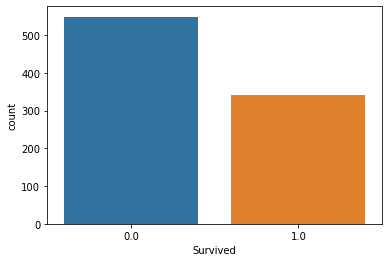

In [275]:
sns.countplot(data =train, x = 'Survived')

In [276]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

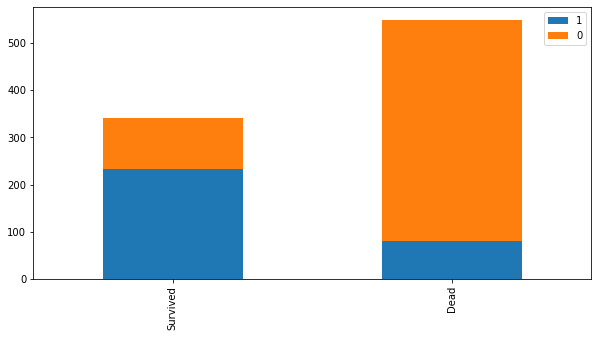

In [277]:
bar_chart('Sex')

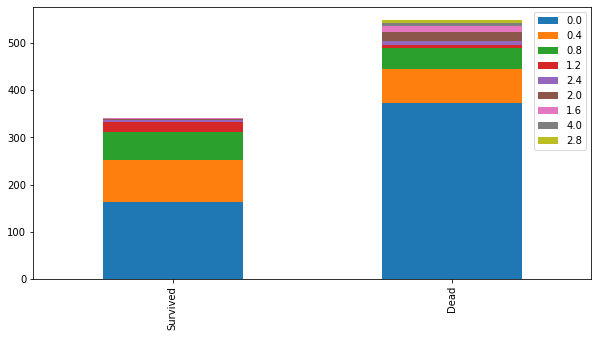

In [278]:
bar_chart('FamilySize')

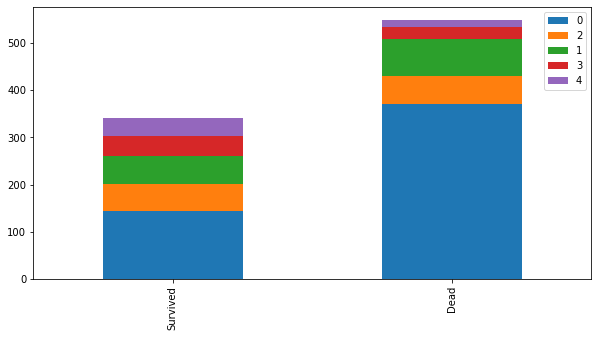

In [279]:
bar_chart('Fare')

# Model Selection

In [280]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [281]:
X = train.drop(['Survived','PassengerId'], axis = 1)
y = train['Survived']

In [282]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [283]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,FamilySize
445,1,0,0,0,2,3,0.000000,0,3,0.8
650,3,0,2,0,0,0,2.050000,0,0,0.0
172,3,1,0,1,1,0,2.050000,0,1,0.8
450,2,0,3,1,2,1,1.721739,0,0,1.2
314,2,0,3,1,1,1,1.721739,0,0,0.8
...,...,...,...,...,...,...,...,...,...,...
106,3,1,1,0,0,0,2.050000,0,1,0.0
270,1,0,2,0,0,2,0.806250,0,0,0.0
860,3,0,3,2,0,0,2.050000,0,0,0.8
435,1,1,0,1,2,4,0.400000,0,1,1.2


In [285]:
pram_grid2 = {'C': [.001,.01,.1,.5,.1],
             'kernel': ['linear', 'poly', 'rbf']}
sv = SVC()
grid = GridSearchCV(sv, pram_grid2)
grid.fit(X_train, y_train)
pred = grid.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.84      0.89      0.86       157
         1.0       0.82      0.76      0.79       111

    accuracy                           0.83       268
   macro avg       0.83      0.82      0.82       268
weighted avg       0.83      0.83      0.83       268



In [237]:
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.83      0.90      0.86       157
         1.0       0.84      0.73      0.78       111

    accuracy                           0.83       268
   macro avg       0.83      0.82      0.82       268
weighted avg       0.83      0.83      0.83       268



In [240]:
final_pred = grid.predict(test.drop(['PassengerId'], axis =1))

In [242]:
subission = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': final_pred })

In [243]:
subission.to_csv('/Users/DELL/Desktop/Data Science Project/Titanic/Submission2.csv', index = False)